So today, I'm going to use the techniques I learnt yesterday and put them to this dataset

In [209]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [210]:
df = pd.read_csv("/kaggle/input/housedata/data.csv")

In [211]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [212]:
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
SeaTac                   29
Vashon                   29
Tukwila                  29
Enumclaw                 28
Carnation                22
Normandy Park            18
Fall City                11
Medina                   11
Clyde Hill               11
Black Diamond             9
Ravensdale                7
Pacific             

In [213]:
df.country.value_counts()

#This column is useless

USA    4600
Name: country, dtype: int64

In [214]:
df.street.value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
14634 128th Ave NE       2
11034 NE 26th Pl         2
1610 N 185th St          2
                        ..
9226 S 239th Pl          1
472-598 Lind Ave NW      1
2303 E Valley St         1
1919 42nd Ave SW         1
7321 39th Ave NE         1
Name: street, Length: 4525, dtype: int64

In [215]:
df.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98354      2
WA 98050      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [216]:
df.date = df.date.apply(lambda x: pd.to_datetime(x.split(' ')[0], format='%Y-%m-%d'))

In [217]:
df['year'] = df.date.dt.year

In [218]:
df['month'] = df.date.dt.month

In [219]:
gb_year = df.groupby('year')
gb_year.mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month
year,,,,,,,,,,,,,,
2014,551962.988473,3.40087,2.160815,2139.346957,14852.516087,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.757609


In [220]:
gb_month = df.groupby('month')
gb_month.mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
month,,,,,,,,,,,,,,
5,533822.837768,3.389706,2.139847,2114.912896,15959.428167,1.493495,0.005656,0.247738,3.436086,1797.126131,317.786765,1970.586538,826.834842,2014.0
6,547968.179909,3.404773,2.164640,2133.363469,14262.325379,1.513538,0.008720,0.241854,3.459844,1822.765489,310.597981,1970.746214,812.791189,2014.0
7,614407.818959,3.418070,2.204824,2225.468606,13824.958652,1.557427,0.006126,0.217458,3.467075,1923.883614,301.584992,1971.460949,745.301685,2014.0


In [221]:
df["last_renov"] = df[["yr_built", "yr_renovated"]].max(axis=1)

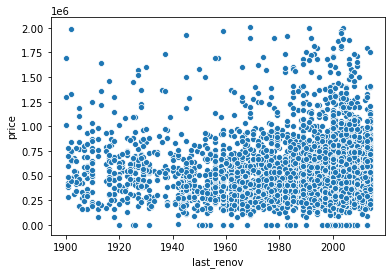

In [222]:
sns.scatterplot(x="last_renov", y="price", data=df[df["price"]  <= df["price"].quantile(.99)])

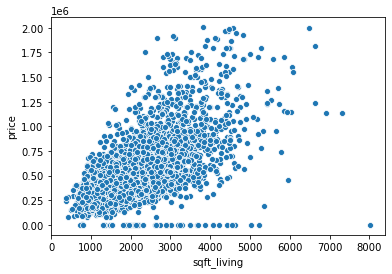

In [223]:
sns.scatterplot(x="sqft_living", y="price", data=df[df.price <= df.price.quantile(.99)])

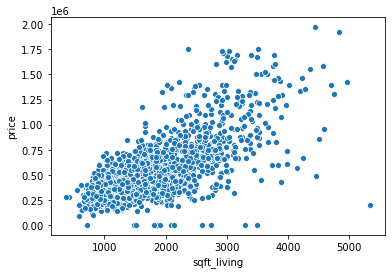

In [224]:
df_seattle = df[df.city == "Seattle"]
sns.scatterplot(x="sqft_living", y="price", data=df_seattle[df_seattle.price <= df_seattle.price.quantile(.99)])

In [225]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month,last_renov
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2005
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,1921
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,1966
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,1963
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7,1979
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7,2009
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7,2009
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7,1974


In [226]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'year', 'month', 'last_renov'],
      dtype='object')

In [227]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.city = le.fit_transform(df[["city"]])
df.statezip = le.fit_transform(df["statezip"])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [228]:
df.view.value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [229]:
df[["city", "statezip"]].corr()

,city,statezip
city,1.000000,0.683512
statezip,0.683512,1.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [231]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month,last_renov
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,36,62,USA,2014,5,2005
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,280,1921,0,709 W Blaine St,35,58,USA,2014,5,1921
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,18,26,USA,2014,5,1966
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,3,7,USA,2014,5,1963
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,31,31,USA,2014,5,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,0,1954,1979,501 N 143rd St,35,62,USA,2014,7,1979
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,0,1983,2009,14855 SE 10th Pl,3,6,USA,2014,7,2009
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,0,2009,0,759 Ilwaco Pl NE,32,37,USA,2014,7,2009
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,1020,1974,0,5148 S Creston St,35,71,USA,2014,7,1974


In [232]:
y_test

3467     279900.0
1940     440000.0
1859     837500.0
3371     205000.0
1084     195000.0
          ...    
2030    1300000.0
2951     291000.0
1110     600000.0
3843     540000.0
3797     535000.0
Name: price, Length: 920, dtype: float64

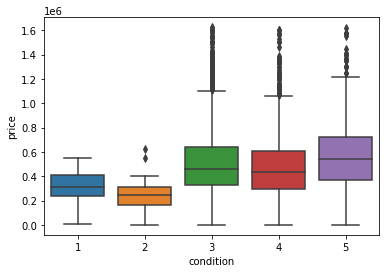

In [233]:
sns.boxplot(x="condition", y="price", data=df[df.price<=df.price.quantile(.98)])

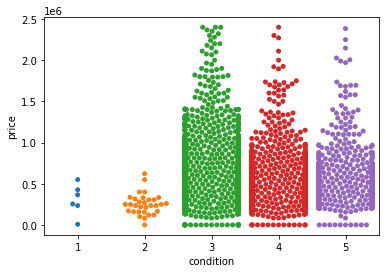

In [234]:
sns.swarmplot(x="condition", y="price", data=df[df.price<=df.price.quantile(.995)])

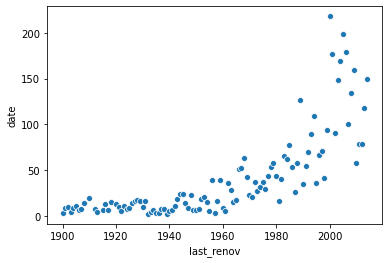

In [235]:
sns.scatterplot(x=idx, y ='date', data= df.groupby("last_renov").count())

In [236]:
df.drop(["street", "date", "country", "yr_built", "yr_renovated"],axis = 1, inplace = True)

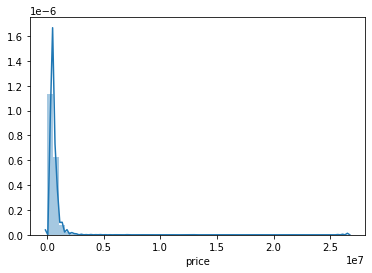

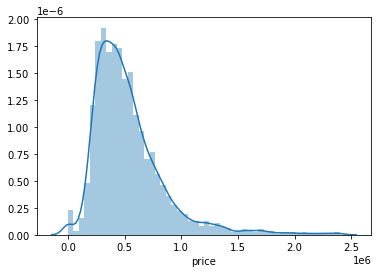

In [237]:
sns.distplot(df.price)
plt.show()
sns.distplot(df[df.price <= df.price.quantile(.995)].price)

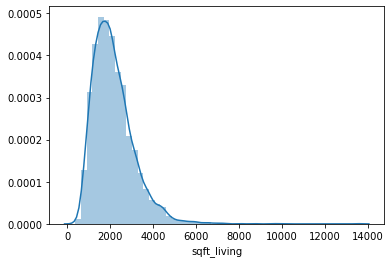

In [238]:
sns.distplot(df.sqft_living)

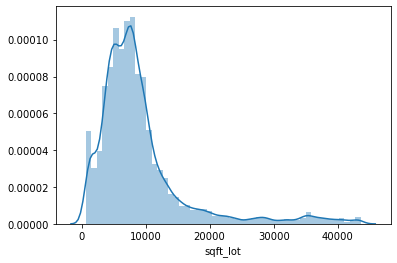

In [239]:
sns.distplot(df[df.sqft_lot <= df.sqft_lot.quantile(.95)].sqft_lot)

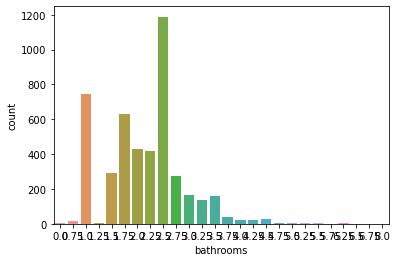

In [240]:
sns.countplot(df.bathrooms)

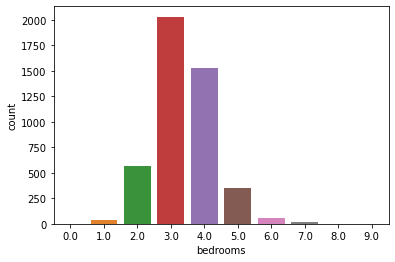

In [241]:
sns.countplot(df.bedrooms)

There're features with string!!, I have no idea how to deal with it

In [242]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

col_trans = make_column_transformer(
        (OneHotEncoder(handle_unknown = 'ignore'), ["waterfront", "view", "condition", "city", "statezip"]),
        (StandardScaler(), ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement"]),
        remainder = "passthrough"
)

In [243]:
from sklearn.model_selection import train_test_split
X = df.drop("price", axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
linR = LinearRegression()
logR = LogisticRegression()
pipe = make_pipeline(col_trans, linR)

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'view',
                                                   'condition', 'city',
                                                   'statezip']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement'])])),
                ('linearregression', LinearRegression())])

In [245]:
print("Mean Absolute Error: %f" %(np.abs(pipe.predict(X_test) - y_test).mean()))


Mean Absolute Error: 117492.386762
